**EDA**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv('/content/Bank Customer Churn Prediction.csv')
data.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
data.shape


(10000, 12)

In [5]:
data.isnull().sum()


,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [6]:
data.nunique()

,0
customer_id,10000
credit_score,460
country,3
gender,2
age,70
tenure,11
balance,6382
products_number,4
credit_card,2
active_member,2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [8]:
print(data['age'].value_counts())

age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64


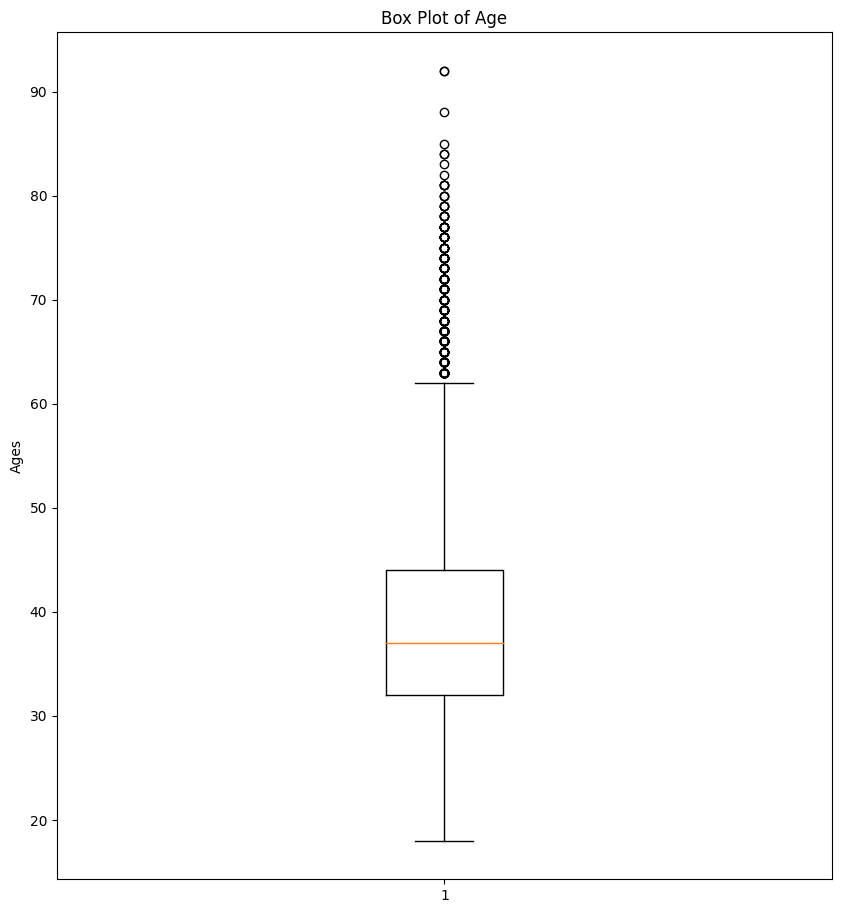

In [9]:
figure = plt.figure(figsize=(10,11))
plt.boxplot(data['age'])
plt.ylabel('Ages')
plt.title('Box Plot of Age')
plt.show()

In [10]:
import pandas as pd

# Identify the column you want to check for outliers (e.g., 'cretid_chart')
column = 'age'

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data[column].quantile(0.25)
Q3 = data[column].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define outliers as points outside of [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]

# Print the number of outliers
print(f'Number of outliers in {column}: {num_outliers}')

Number of outliers in age: 359


In [11]:
# Remove outliers
data = data[(data['age'] >= lower_bound) & (data['age'] <= upper_bound)]

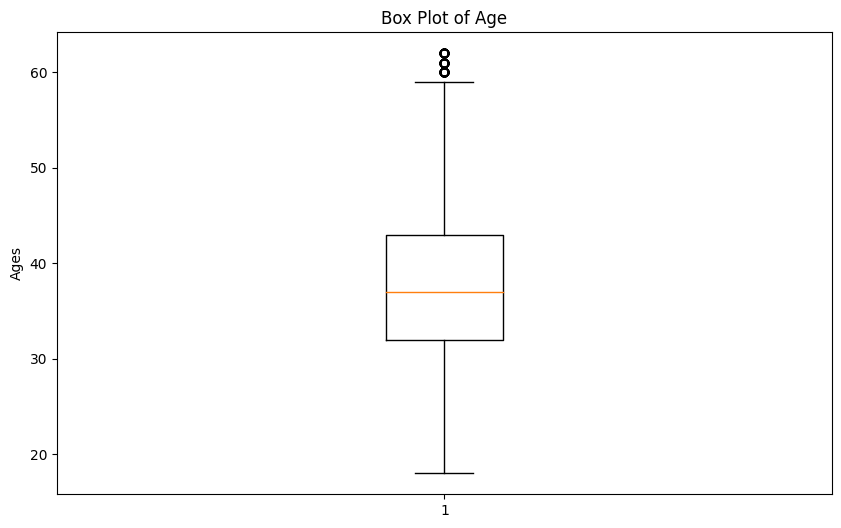

In [13]:
figure = plt.figure(figsize=(10,6))
plt.boxplot(data['age'])
plt.ylabel('Ages')
plt.title('Box Plot of Age')
plt.show()

In [14]:
data.loc[data['products_number'] == 4, 'products_number']=3

In [15]:
data['credit_score_seg'] = pd.cut(data['credit_score'], bins=[349, 500, 590, 620, 660, 690, 720, np.inf],
                                labels=['A', 'B', 'C', 'D','E','F','G'])

In [16]:
data['balance_seg'] = pd.cut(data['balance'], bins=[-1, 50000, 90000, 127000, np.inf],
                           labels=['A','B','C','D'])

In [17]:
data['age_seg'] = pd.cut(data['age'], bins=[17, 36, 55, np.inf],
                       labels=['A','B','C'])

In [18]:
data['tenure_seg'] = pd.cut(data['tenure'], bins=[-1, 3, 5, 7, np.inf],
                          labels=['A','B','C','D'])

In [19]:
data= data.drop('customer_id',axis=1)

In [20]:
data['gender_num'] = data['gender'].map({'Male': 0, 'Female': 1})

In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    # One-hot encode the specified columns without dropping the original columns
    one_hot_encoded = pd.get_dummies(dataframe[categorical_cols], drop_first=drop_first, dtype=int)
    dataframe = pd.concat([dataframe, one_hot_encoded], axis=1)
    return dataframe

def label_encoder(dataframe, binary_col, new_col_name=None, info=False):
    labelencoder = LabelEncoder()

    encoded_col = new_col_name if new_col_name else f"{binary_col}_encoded"

    dataframe[encoded_col] = labelencoder.fit_transform(dataframe[binary_col])
    if info:
        d1, d2 = labelencoder.inverse_transform([0, 1])
        print(f'{binary_col}\n0: {d1}, 1: {d2}')
    return dataframe


In [22]:
data = one_hot_encoder(data, ['country', 'gender','age_seg'], drop_first=True)

label_encoder(data, 'credit_score_seg')
label_encoder(data, 'balance_seg')
label_encoder(data, 'tenure_seg')

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,...,tenure_seg,gender_num,country_Germany,country_Spain,gender_Male,age_seg_B,age_seg_C,credit_score_seg_encoded,balance_seg_encoded,tenure_seg_encoded
0,619,France,Female,42,2,0.00,1,1,1,101348.88,...,A,1,0,0,0,1,0,2,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,...,A,1,0,1,0,1,0,2,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,...,D,1,0,0,0,1,0,1,3,3
3,699,France,Female,39,1,0.00,2,0,0,93826.63,...,A,1,0,0,0,1,0,5,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,...,A,1,0,1,0,1,0,6,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,...,B,0,0,0,1,1,0,6,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,...,D,0,0,0,1,0,0,1,1,3
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,...,C,1,0,0,0,0,0,5,0,2
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,...,A,0,1,0,1,1,0,6,1,0


In [23]:
data['age'].max()

62

In [24]:

data['gender_country'] = data['gender'] + '_' + data['country']

data['balance_salary_ratio'] = data['balance'] / data['estimated_salary']

In [25]:
data['age_group'] = pd.cut(data['age'], bins=[17, 36, 55,np.inf], labels=['17-36','37-55','56-65'])

In [26]:

data['balance_credit_ratio'] = data['balance'] / data['credit_score']


In [27]:
data.head(20)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,...,gender_Male,age_seg_B,age_seg_C,credit_score_seg_encoded,balance_seg_encoded,tenure_seg_encoded,gender_country,balance_salary_ratio,age_group,balance_credit_ratio
0,619,France,Female,42,2,0.00,1,1,1,101348.88,...,0,1,0,2,0,0,Female_France,0.000000,37-55,0.000000
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,...,0,1,0,2,1,0,Female_Spain,0.744677,37-55,137.841875
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,...,0,1,0,1,3,3,Female_France,1.401375,37-55,318.049402
3,699,France,Female,39,1,0.00,2,0,0,93826.63,...,0,1,0,5,0,0,Female_France,0.000000,37-55,0.000000
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,...,0,1,0,6,2,0,Female_Spain,1.587055,37-55,147.659788
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,...,1,1,0,3,2,3,Male_Spain,0.759604,37-55,176.365550
6,822,France,Male,50,7,0.00,2,1,1,10062.80,...,1,1,0,6,0,2,Male_France,0.000000,37-55,0.000000
7,376,Germany,Female,29,4,115046.74,3,1,0,119346.88,...,0,0,0,0,2,1,Female_Germany,0.963969,17-36,305.975372
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,...,1,1,0,1,3,1,Male_France,1.895518,37-55,283.535070
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,...,1,0,0,4,3,0,Male_France,1.876647,17-36,196.789298


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9641 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   credit_score              9641 non-null   int64   
 1   country                   9641 non-null   object  
 2   gender                    9641 non-null   object  
 3   age                       9641 non-null   int64   
 4   tenure                    9641 non-null   int64   
 5   balance                   9641 non-null   float64 
 6   products_number           9641 non-null   int64   
 7   credit_card               9641 non-null   int64   
 8   active_member             9641 non-null   int64   
 9   estimated_salary          9641 non-null   float64 
 10  churn                     9641 non-null   int64   
 11  credit_score_seg          9641 non-null   category
 12  balance_seg               9641 non-null   category
 13  age_seg                   9641 non-null   category
 1

In [29]:
data.drop(['tenure_seg','balance_seg','credit_score_seg'],axis=1,inplace=True)

In [30]:
data.drop('age_seg',axis=1,inplace=True)

In [31]:
data.rename(columns={
    'credit_score_seg_encoded': 'credit_score_seg',
    'balance_seg_encoded': 'balance_seg',
    'tenure_seg_encoded': 'tenure_seg'
}, inplace=True)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9641 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   credit_score          9641 non-null   int64   
 1   country               9641 non-null   object  
 2   gender                9641 non-null   object  
 3   age                   9641 non-null   int64   
 4   tenure                9641 non-null   int64   
 5   balance               9641 non-null   float64 
 6   products_number       9641 non-null   int64   
 7   credit_card           9641 non-null   int64   
 8   active_member         9641 non-null   int64   
 9   estimated_salary      9641 non-null   float64 
 10  churn                 9641 non-null   int64   
 11  gender_num            9641 non-null   int64   
 12  country_Germany       9641 non-null   int64   
 13  country_Spain         9641 non-null   int64   
 14  gender_Male           9641 non-null   int64   
 15  age_seg_B

In [33]:
# genurate column age_seg_A
data['age_seg_A'] = data['age_group'].apply(lambda x: 1 if x == '17-36' else 0)

In [34]:
data.head(20)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,...,age_seg_B,age_seg_C,credit_score_seg,balance_seg,tenure_seg,gender_country,balance_salary_ratio,age_group,balance_credit_ratio,age_seg_A
0,619,France,Female,42,2,0.00,1,1,1,101348.88,...,1,0,2,0,0,Female_France,0.000000,37-55,0.000000,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,...,1,0,2,1,0,Female_Spain,0.744677,37-55,137.841875,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,...,1,0,1,3,3,Female_France,1.401375,37-55,318.049402,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,...,1,0,5,0,0,Female_France,0.000000,37-55,0.000000,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,...,1,0,6,2,0,Female_Spain,1.587055,37-55,147.659788,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,...,1,0,3,2,3,Male_Spain,0.759604,37-55,176.365550,0
6,822,France,Male,50,7,0.00,2,1,1,10062.80,...,1,0,6,0,2,Male_France,0.000000,37-55,0.000000,0
7,376,Germany,Female,29,4,115046.74,3,1,0,119346.88,...,0,0,0,2,1,Female_Germany,0.963969,17-36,305.975372,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,...,1,0,1,3,1,Male_France,1.895518,37-55,283.535070,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,...,0,0,4,3,0,Male_France,1.876647,17-36,196.789298,1


In [35]:
data.to_csv('modified_Bank Customer Churn Prediction.csv', index=False)

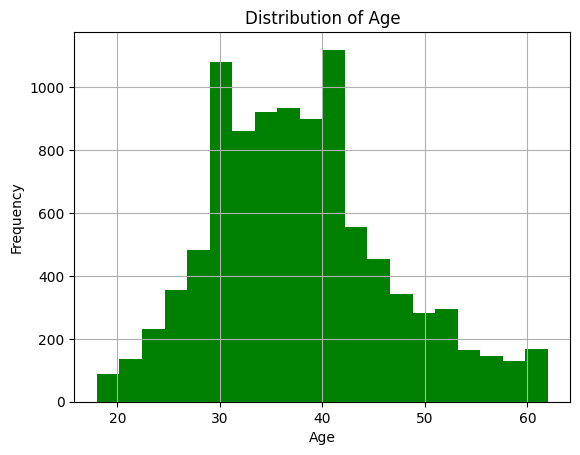

In [43]:
plt.hist(data['age'], facecolor='g' ,bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.grid(True)
plt.show()

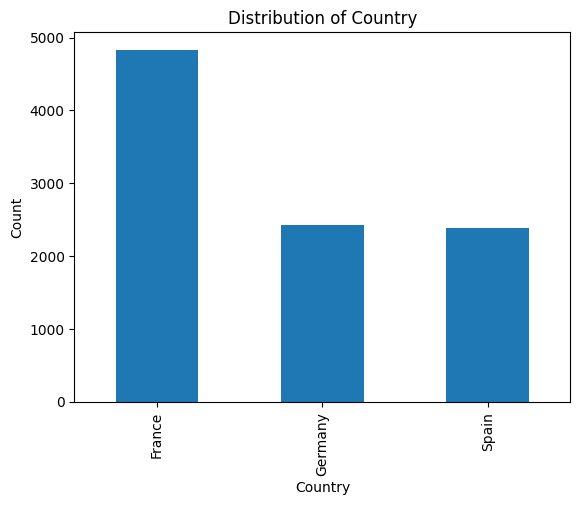

In [37]:
data['country'].value_counts().plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Country')
plt.show()

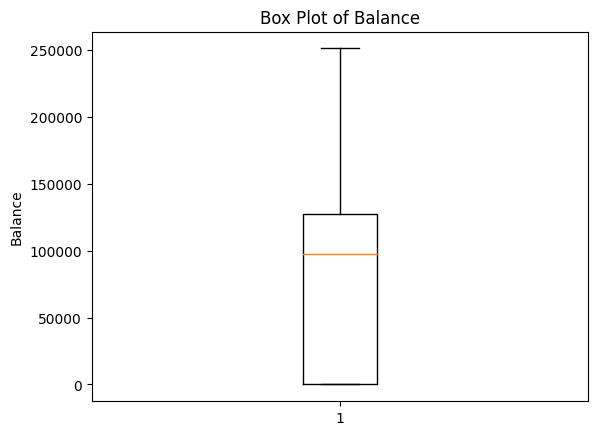

In [38]:
plt.boxplot(data['balance'])
plt.ylabel('Balance')
plt.title('Box Plot of Balance')
plt.show()

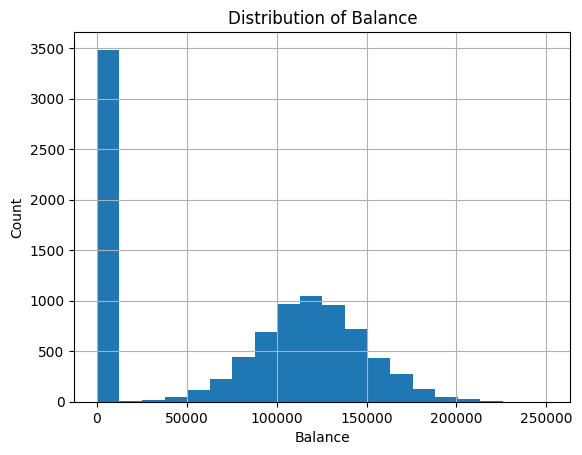

In [48]:
plt.hist(data['balance'], bins=20)
plt.xlabel('Balance')
plt.ylabel('Count')
plt.title('Distribution of Balance')
plt.grid(True)
plt.show()

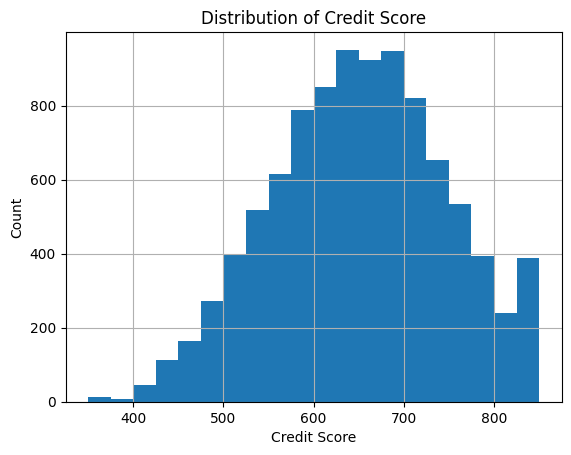

In [47]:
plt.hist(data['credit_score'] ,bins=20)
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.title('Distribution of Credit Score')
plt.grid(True)
plt.show()

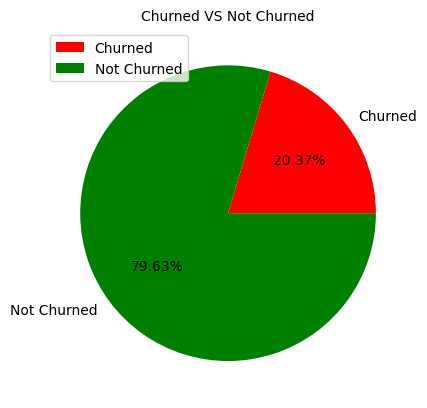

In [ ]:
sizes = [data.churn[data['churn']==1].count(), data.churn[data['churn']==0].count()]
labels = ['Churned', 'Not Churned']
colors = ['red', 'Green']

plt.pie(sizes, labels=labels, autopct='%.2f%%', colors=colors)
plt.legend(loc='upper left')
plt.title("Churned VS Not Churned", size=10)
plt.show()

In [70]:
print(data.churn[data['churn']==1].count())
print(data.churn[data['churn']==0].count())

1964
7677


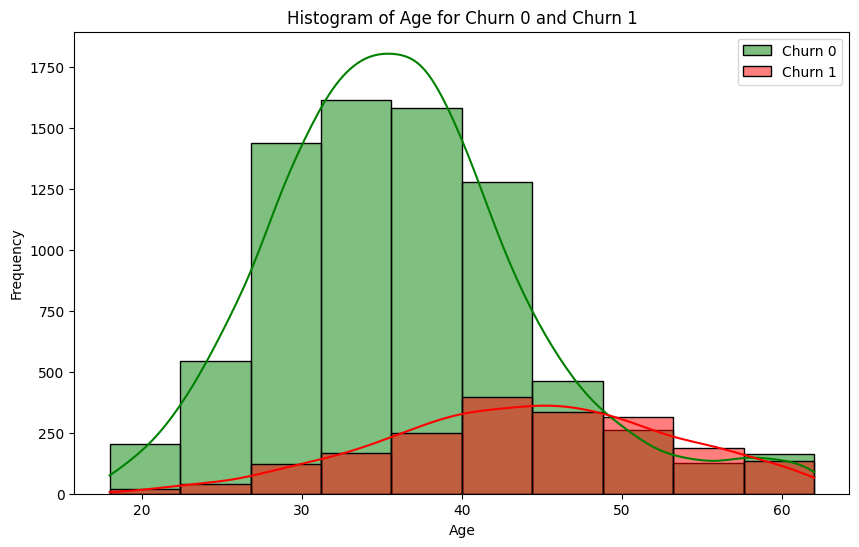

In [68]:
churn_0_age = data[data["churn"] == 0]["age"]
churn_1_age = data[data["churn"] == 1]["age"]
plt.figure(figsize=(10, 6))
sns.histplot(churn_0_age, bins=10, color="Green", label="Churn 0", kde=True)
sns.histplot(churn_1_age, bins=10, color="Red", label="Churn 1", kde=True)

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age for Churn 0 and Churn 1")
plt.legend()
plt.show()

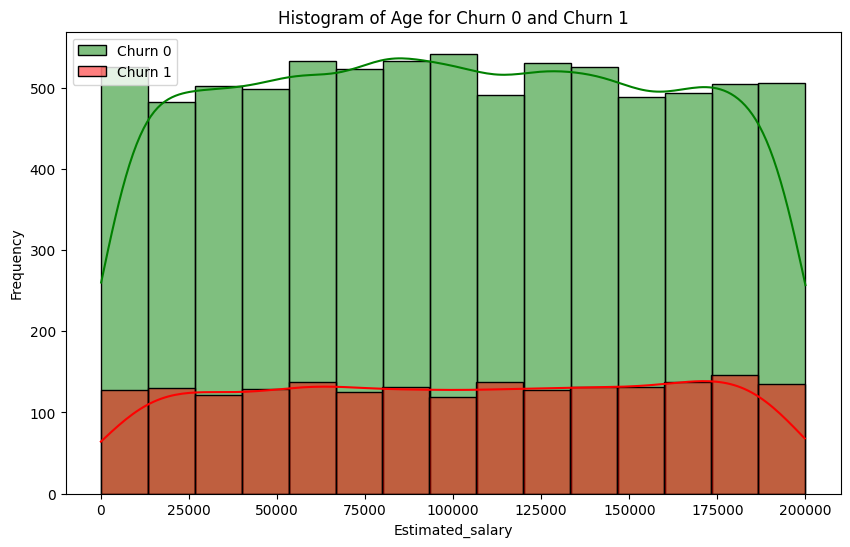

In [63]:
churn_0_age = data[data["churn"] == 0]["estimated_salary"]
churn_1_age = data[data["churn"] == 1]["estimated_salary"]
plt.figure(figsize=(10, 6))
sns.histplot(churn_0_age, bins=15, color="Green", label="Churn 0", kde=True)
sns.histplot(churn_1_age, bins=15, color="Red", label="Churn 1", kde=True)
plt.xlabel("Estimated_salary")
plt.ylabel("Frequency")
plt.title("Histogram of Age for Churn 0 and Churn 1")
plt.legend()
plt.show()

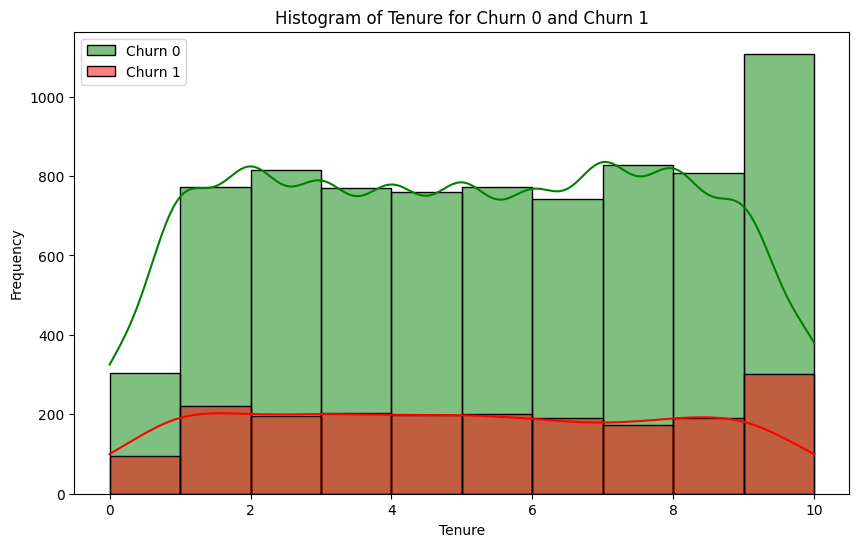

In [65]:
churn_0_age = data[data["churn"] == 0]["tenure"]
churn_1_age = data[data["churn"] == 1]["tenure"]

plt.figure(figsize=(10, 6))

# Using seaborn for better visualization and styling
sns.histplot(churn_0_age, bins=10, color="Green", label="Churn 0", kde=True)
sns.histplot(churn_1_age, bins=10, color="Red", label="Churn 1", kde=True)

plt.xlabel("Tenure")
plt.ylabel("Frequency")
plt.title("Histogram of Tenure for Churn 0 and Churn 1")
plt.legend()
plt.show()

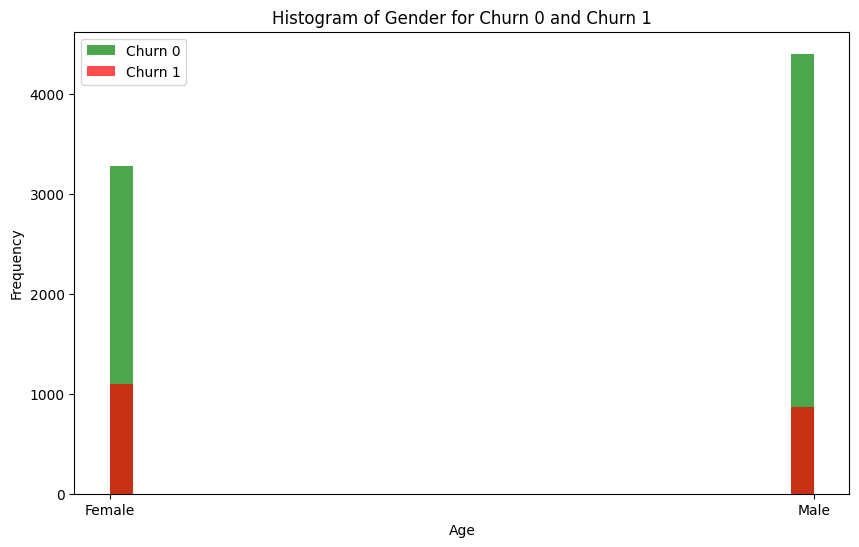

In [67]:
churn_0_age = data[data["churn"] == 0]["gender"]
churn_1_age = data[data["churn"] == 1]["gender"]
plt.figure(figsize=(10, 6))
plt.hist(churn_0_age, bins=30, alpha=0.7, color="Green", label="Churn 0")
plt.hist(churn_1_age, bins=30, alpha=0.7, color="Red", label="Churn 1")

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Gender for Churn 0 and Churn 1")
plt.legend()
plt.show()

<Axes: xlabel='credit_card'>

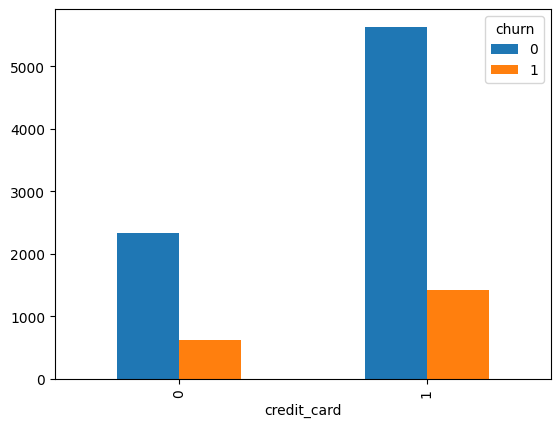

In [ ]:
data.groupby(['credit_card', 'churn']).churn.count().unstack().plot(kind='bar')

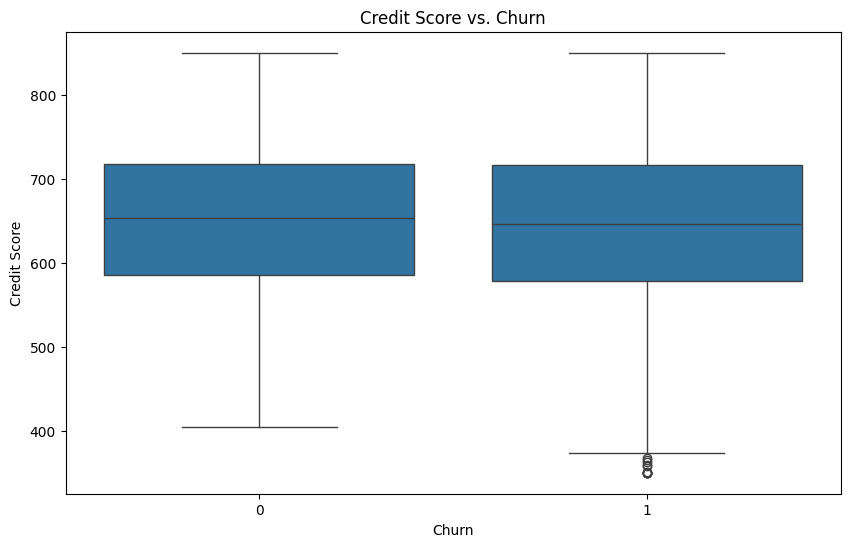

              credit_score     churn
credit_score      1.000000 -0.027094
churn            -0.027094  1.000000


In [ ]:
# prompt: Credit Score and Churn
# How does a customer’s credit score relate to their likelihood of churning?

plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='credit_score', data=data)
plt.title('Credit Score vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Credit Score')
plt.show()
correlation_matrix = data[['credit_score', 'churn']].corr()
print(correlation_matrix)

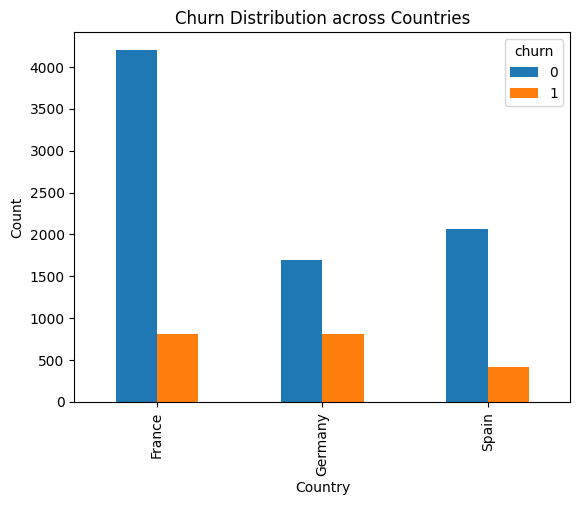

In [ ]:
pd.crosstab(data['country'], data['churn']).plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Churn Distribution across Countries')
plt.show()

In [69]:
country_churn_counts = pd.crosstab(data['country'], data['churn'])
print(country_churn_counts)

churn       0    1
country           
France   4049  783
Germany  1640  785
Spain    1988  396


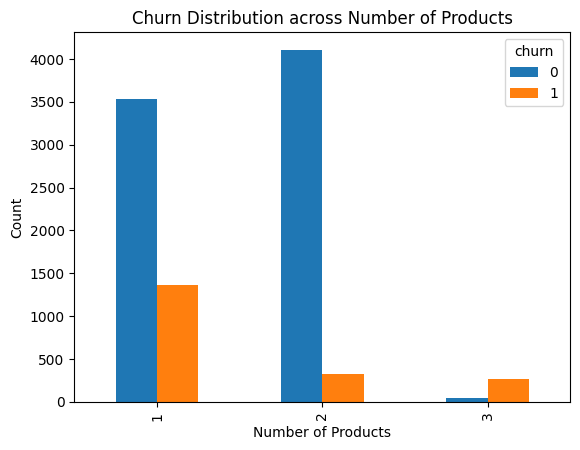

In [50]:
pd.crosstab(data['products_number'], data['churn']).plot(kind='bar')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.title('Churn Distribution across Number of Products')
plt.show()

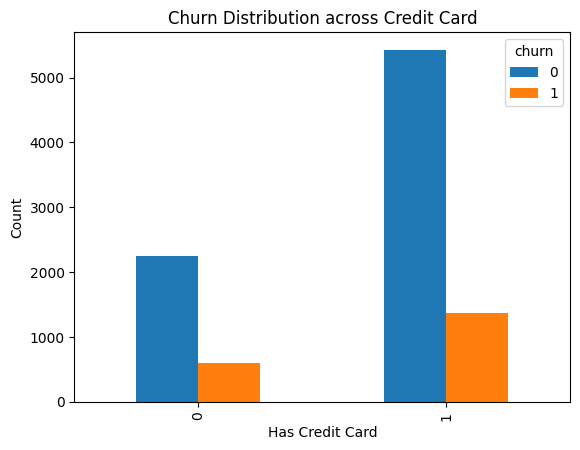

In [52]:
pd.crosstab(data['credit_card'], data['churn']).plot(kind='bar')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.title('Churn Distribution across Credit Card')
plt.show()

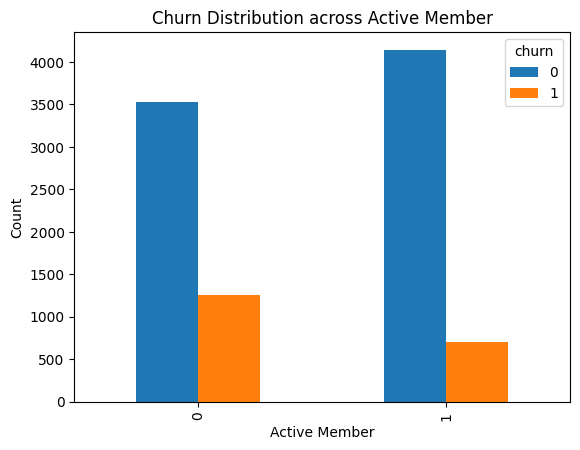

In [53]:
pd.crosstab(data['active_member'], data['churn']).plot(kind='bar')
plt.xlabel('Active Member')
plt.ylabel('Count')
plt.title('Churn Distribution across Active Member')
plt.show()

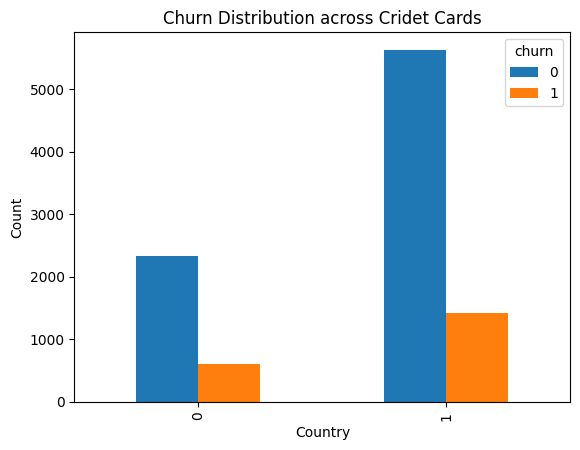

In [ ]:
pd.crosstab(data['credit_card'], data['churn']).plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Churn Distribution across Cridet Cards')
plt.show()

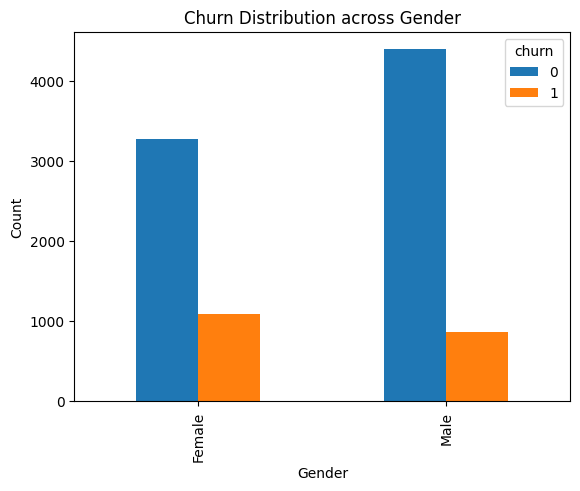

In [ ]:
pd.crosstab(data['gender'], data['churn']).plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn Distribution across Gender')
plt.show()

In [71]:
gender_churn_counts = pd.crosstab(data['gender'], data['churn'])
print(gender_churn_counts)

churn      0     1
gender            
Female  3278  1098
Male    4399   866


<ipython-input-60-e5be2abab460>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='age', data=data, palette="Set2")


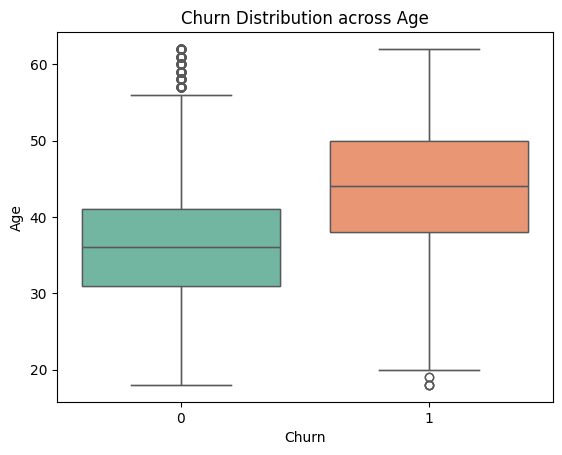

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Using 'color' for a single color:
sns.boxplot(x='churn', y='age', data=data, color='skyblue')

# Using 'palette' for multiple colors (one for each box):
sns.boxplot(x='churn', y='age', data=data, palette="Set2")

plt.xlabel('Churn')
plt.ylabel('Age')
plt.title('Churn Distribution across Age')
plt.show()

<ipython-input-61-2cd864a65519>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='balance', data=data, palette="Set2")


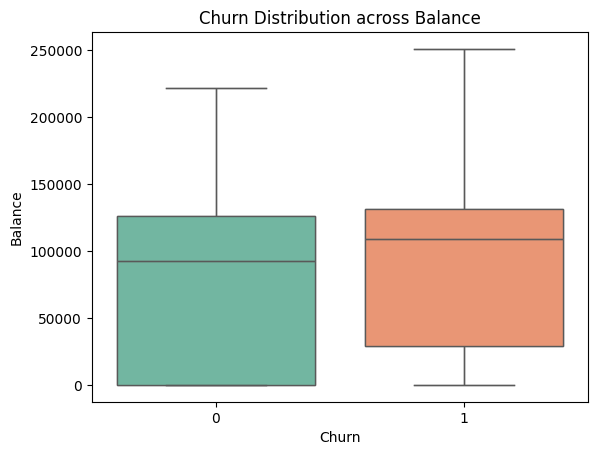

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Using 'color' for a single color:
sns.boxplot(x='churn', y='balance', data=data, color='skyblue')

# Using 'palette' for multiple colors (one for each box):
sns.boxplot(x='churn', y='balance', data=data, palette="Set2")

plt.xlabel('Churn')
plt.ylabel('Balance')
plt.title('Churn Distribution across Balance')
plt.show()

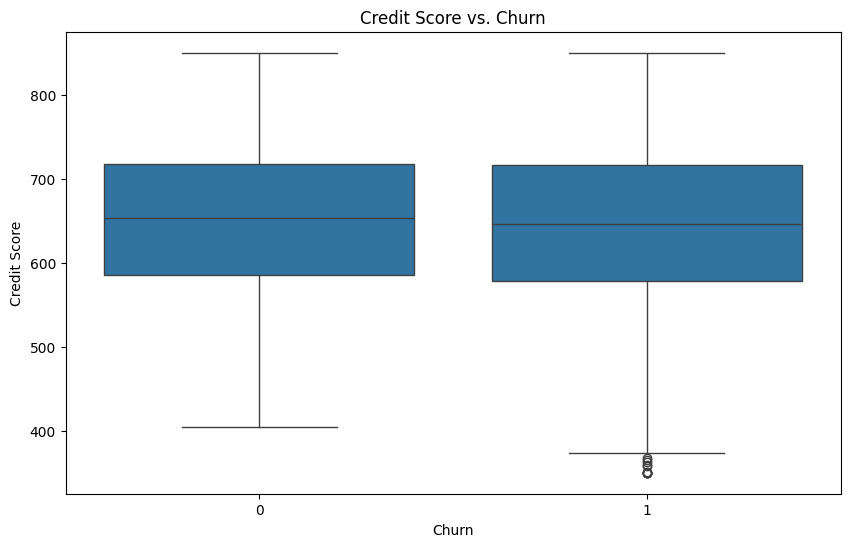

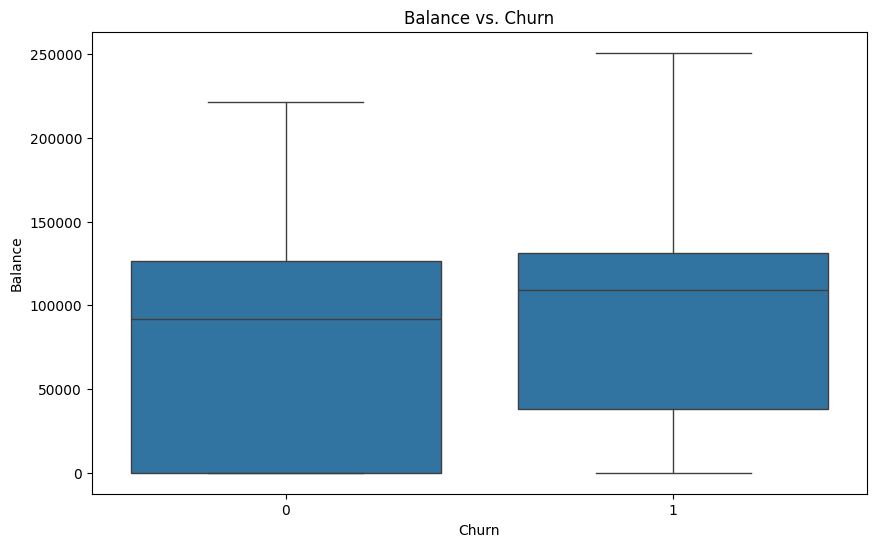

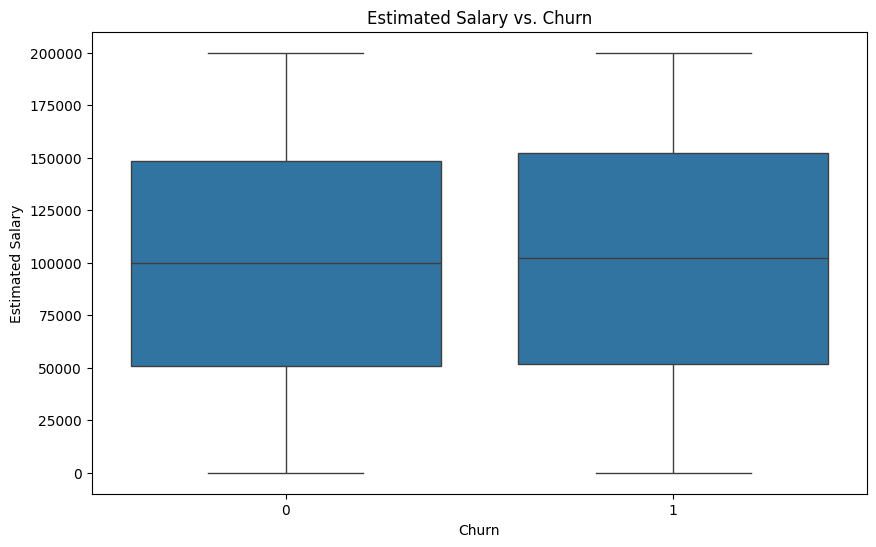

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='credit_score', data=data)
plt.title('Credit Score vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Credit Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='balance', data=data)
plt.title('Balance vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Balance')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='estimated_salary', data=data)
plt.title('Estimated Salary vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Estimated Salary')
plt.show()

**Analyze distributions of categorical features**

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


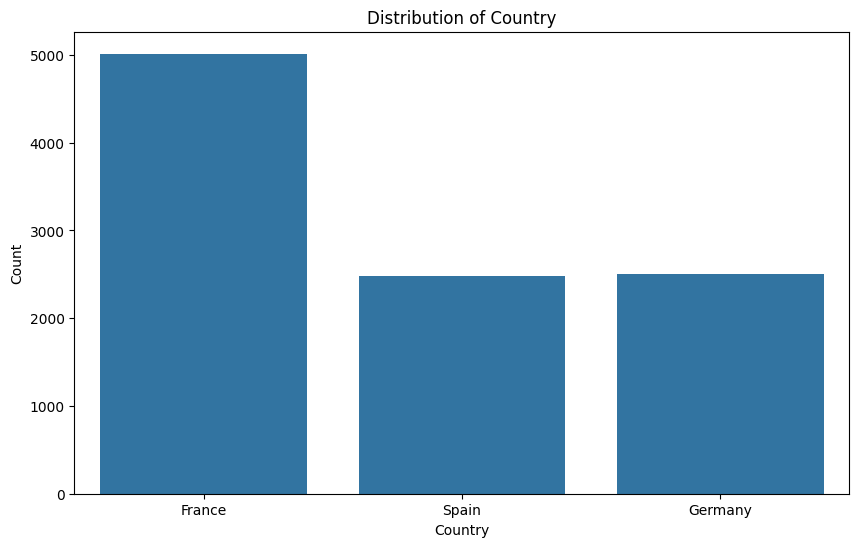

gender
Male      5457
Female    4543
Name: count, dtype: int64


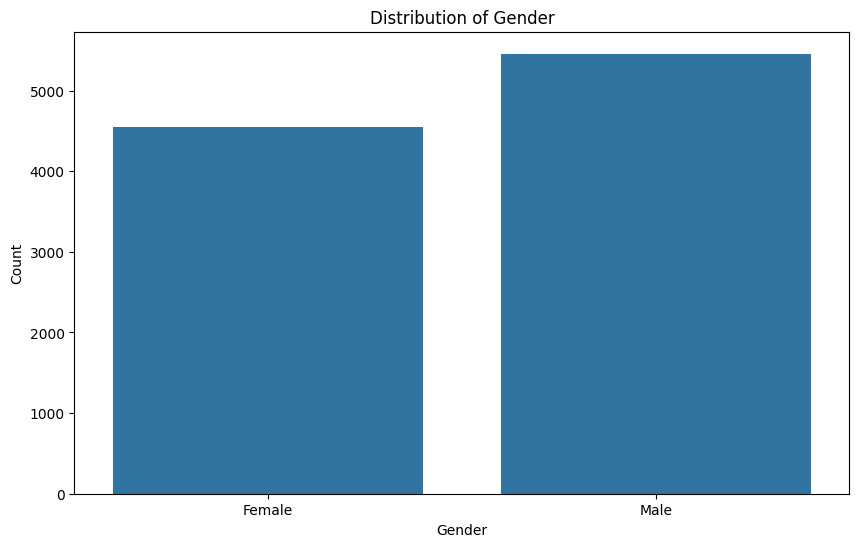

credit_card
1    7055
0    2945
Name: count, dtype: int64


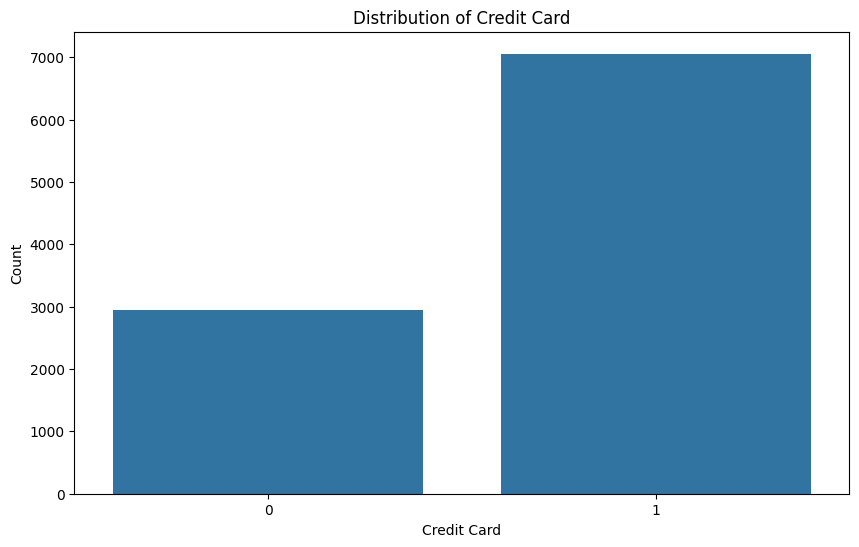

In [ ]:
# Country
print(data['country'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x='country', data=data)
plt.title('Distribution of Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

# Gender
print(data['gender'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=data)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Credit Card
print(data['credit_card'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x='credit_card', data=data)
plt.title('Distribution of Credit Card')
plt.xlabel('Credit Card')
plt.ylabel('Count')
plt.show()

In [ ]:
data.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn', 'gender_num', 'country_Germany', 'country_Spain',
       'gender_Male', 'age_seg_B', 'age_seg_C', 'credit_score_seg',
       'balance_seg', 'tenure_seg', 'gender_country', 'balance_salary_ratio',
       'age_group', 'balance_credit_ratio', 'age_seg_A'],
      dtype='object')

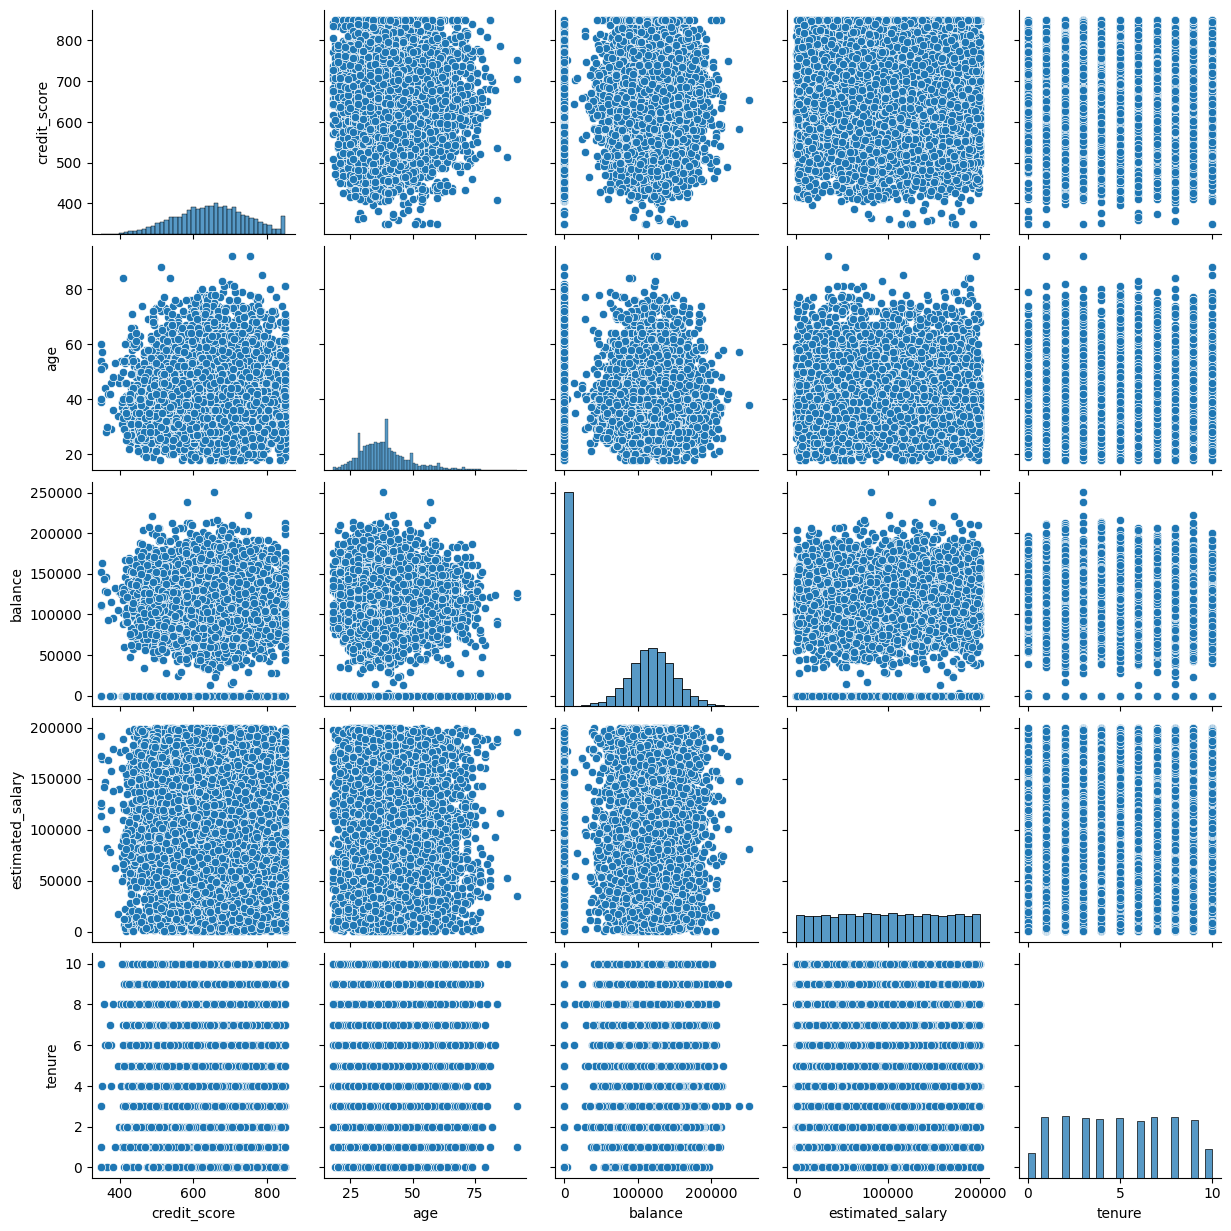

In [ ]:
numerical_features = ["credit_score", "age", "balance", "estimated_salary", "tenure"]
sns.pairplot(data[numerical_features])
plt.show()

<Axes: xlabel='products_number'>

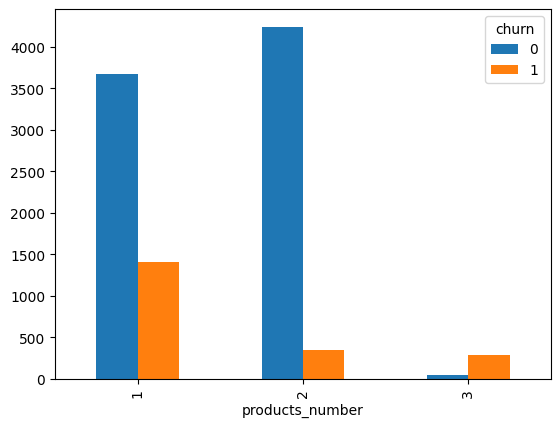

In [ ]:
data.groupby(['products_number','churn']).churn.count().unstack().plot(kind='bar')